In [65]:
import numpy as np
import math

In [66]:
x =np.array([[8, 7, 2, 1], [5, 3, 7, 5], [7, 5, 6, 4],[9, 9, 7, 3], [11, 10, 3, 7], [6, 9, 5, 4]])

In [67]:
x_sum=np.array(sum(x**2,0))
x_sums=np.array(np.cumsum(x**2,0))

In [68]:
x_norm=np.array([[round(x[i,j]/math.sqrt(x_sum[j]),3) for j in range(4) ] for i in range(6)])

In [69]:
x_norm

array([[0.413, 0.377, 0.152, 0.093],
       [0.258, 0.162, 0.534, 0.464],
       [0.361, 0.269, 0.457, 0.371],
       [0.464, 0.485, 0.534, 0.279],
       [0.567, 0.538, 0.229, 0.65 ],
       [0.309, 0.485, 0.381, 0.371]])

In [70]:
x_norm[1][2]

0.534

In [12]:
weights=np.array([0.4,0.3,0.1,0.2])

In [13]:
x_w=np.array([[x_norm[i,j]*weights[j] for j in range(4)]for i in range(6)])

In [15]:
x_w

array([[0.1652, 0.1131, 0.0152, 0.0186],
       [0.1032, 0.0486, 0.0534, 0.0928],
       [0.1444, 0.0807, 0.0457, 0.0742],
       [0.1856, 0.1455, 0.0534, 0.0558],
       [0.2268, 0.1614, 0.0229, 0.13  ],
       [0.1236, 0.1455, 0.0381, 0.0742]])

In [32]:
ideal=np.array([np.max(x_w[:,0]),np.max(x_w[:,1]),np.max(x_w[:,2]),np.max(x_w[:,3])])

In [42]:
anti=np.array([np.min(x_w[:,0]),np.min(x_w[:,1]),np.min(x_w[:,2]),np.min(x_w[:,3])])

In [47]:
D_1=np.array([sum((x_w[i,j]-ideal[j])**2 for j in range(4))for i in range(6) ])
D_1=np.array([math.sqrt(D_1[i])for i in range(6)])

In [48]:
D_2=np.array([sum((x_w[i,j]-anti[j])**2 for j in range(4))for i in range(6) ])
D_2=np.array([math.sqrt(D_2[i])for i in range(6)])

In [49]:
score=np.array([D_2[i]/(D_1[i]+D_2[i])for i in range(6)])

In [51]:
x=[i+1 for i in range(6)]

In [53]:
import matplotlib.pyplot as plt

In [62]:
D_1

array([0.14140951, 0.17141949, 0.12835568, 0.0863475 , 0.0305    ,
       0.11937663])

In [63]:
D_2

array([0.08946647, 0.08345586, 0.0821551 , 0.1379219 , 0.20117169,
       0.11585137])

In [64]:
score

array([0.38750879, 0.32743794, 0.39026552, 0.61498315, 0.86834818,
       0.49250672])

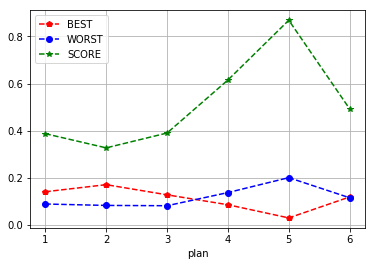

In [61]:
plt.figure()
plt.plot(x,D_1,'p--',color='red')
plt.plot(x,D_2,'o--',color='blue')
plt.plot(x,score,'*--',color='green')
plt.legend(['BEST','WORST','SCORE'])
plt.legend(labels=['BEST','WORST','SCORE'])
plt.xlabel('plan')
plt.grid(True)

In [191]:
def b_w_value(a,b):# b 是标准【max、or min】
    f=np.zeros((b.shape[0],2))
    for i in range(b.shape[0]):
        if b[i]=='MAX':
            f[i,0]=np.max(a[:,i])
            f[i,1]==np.min(a[:,i])
        elif b[i]=='MIN':
            f[i,0]=np.min(a[:,i])
            f[i,1]=np.max(a[:,i])
    return f
            
        
    

In [115]:
def SR(a,b,c):#b 是最好/坏（f），c是标准的权重
    s=np.zeros(a.shape[0])
    r=np.zeros(a.shape[0])
    for i in range(a.shape[0]):
        k=np.zeros(a.shape[1])
      
        for j in range(a.shape[1]):
            k[j]=c[j]*(b[j,0]-a[i,j])/(b[j,0]-b[j,1])
        s[i]=np.round(np.sum(k),3)
        r[i]=np.round(np.max(k),3)
    return s,r
                   
    
    
   
    

In [116]:
def Q(s,r,n):#s,r为SR函数求出的，n为标准数
    q=np.zeros(a.shape[0])
    z=(n+1)/(2*n)#######分母除法要加括号！！！！！！！！！！！！！！！！
    for i in range(a.shape[0]):
        q[i]=np.round(z*(s[i]-np.min(s))/(np.max(s)-np.min(s))+(1-z)*(r[i]-np.min(r))/(np.max(r)-np.min(r)),3)
    return q

In [117]:
def VIKOR(a,b,c,pl):# b为【min，max】c为权重
    s,r=SR(a,b_w_value(a,b),c)
    q=Q(s,r,len(c))
    if pl=='y':
        x=[i+1 for i in range(a.shape[0])]
        plt.figure()
        plt.plot(x,s,'p--',color='blue')
        plt.plot(x,r,'o--',color='green')
        plt.plot(x,q,'*--',color='red')
        plt.legend(['S','R','Q'])
        plt.title('VIKOR')
        plt.legend(labels=['S','R','Q'])
        plt.show()
    return s,r,q
    


In [118]:
#def Q_1(s,r,n):
 #   q =np.zeros(s.shape[0])
 #   for i in range(s.shape[0]):
  #      q[i] =np.round((((n + 1) / (2*n))*
   #     (s[i] -np.min(s))/(max(s) -np.min(s)) +
    #    (1-(n+1)/(2*n))*
     #   (r[i] -np.min(r))/(max(r) -np.min(r))), 3)   
        
    #return q
    

In [119]:
a=np.array([[8, 7, 2, 1], [5, 3, 7, 5], [7, 5, 6, 4],[9, 9, 7, 3], [11, 10, 3, 7], [6, 9, 5, 4]])
b=np.array(['MAX','MAX','MAX','MAX'])
c=np.array([0.4,0.3,0.1,0.2])

In [120]:
import numpy as np
import matplotlib.pyplot as plt

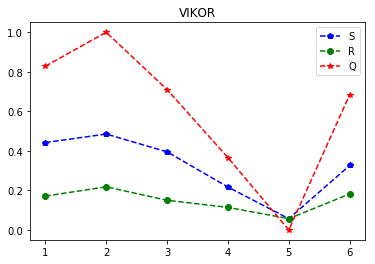

(array([0.442, 0.485, 0.395, 0.217, 0.057, 0.326]),
 array([0.171, 0.218, 0.15 , 0.114, 0.057, 0.182]),
 array([0.828, 1.   , 0.71 , 0.366, 0.   , 0.684]))

In [121]:
VIKOR(a,b,c,'y')

In [253]:
import numpy as np
import matplotlib.pyplot as plt

In [254]:
def agg_fuzzy_value(a,b,k):
    f=np.zeros(len(b),4)
    


In [255]:
 cw = {'VL':[0, 0, 0.1, 0.2],
       'L':[0.1, 0.2, 0.2, 0.3],
       'ML':[0.2, 0.3, 0.4, 0.5],
       'M':[0.4, 0.5, 0.5, 0.6],
       'MH':[0.5, 0.6, 0.7, 0.8], 
       'H':[0.7, 0.8, 0.8, 0.9],
      'VH':[0.8, 0.9, 1, 1]} 

In [256]:
 R = {'VP':[0.0, 0.0, 0.1, 0.2], 
      'P':[0.1, 0.2, 0.2, 0.3], 
      'MP':[ 0.2, 0.3, 0.4, 0.5], 
      'F':[0.4, 0.5, 0.5, 0.6],
      'MG':[0.5, 0.6, 0.7, 0.8], 
      'G':[0.7, 0.8, 0.8, 0.9],
      'VG':[0.8, 0.9, 1.0, 1.0]} 

In [257]:
 cdw = np.array([['H', 'VH', 'VH'], ['M', 'H', 'VH'],['M', 'MH', 'ML'], ['H', 'VH', 'MH']])

In [258]:
c1 = [['VG', 'G', 'MG'], ['F', 'MG', 'MG'],
       ['P', 'P', 'MP'], ['G', 'VG', 'G']] 
c2 = [['MP', 'F', 'F'], ['F', 'VG', 'G'],
      ['MG', 'VG', 'G'], ['MG', 'F', 'MP']] 
c3 = [['MG', 'MP', 'F'], ['MG', 'MG', 'VG'],
      ['MP', 'F', 'F'], ['MP', 'P', 'P']] 
c4 = [['MG', 'VG', 'VG'], ['G', 'G', 'VG'], 
      ['MG', 'VG', 'G'], ['VP', 'F', 'P']] 
c5 = [['VP', 'P', 'G'], ['P', 'VP', 'MP'], 
      ['G', 'G', 'VG'], ['G', 'MG', 'MG']] 
c6 = [['F', 'G', 'G'], ['F', 'MP', 'MG'],
        ['VG', 'MG', 'F'], ['P', 'MP', 'F']] 

In [288]:
crit_max_min=np.array(['MAX','MAX','MAX','MAX'])

In [260]:
all_rating=np.vstack((c1,c2,c3,c4,c5,c6))

In [261]:
all_rating

array([['VG', 'G', 'MG'],
       ['F', 'MG', 'MG'],
       ['P', 'P', 'MP'],
       ['G', 'VG', 'G'],
       ['MP', 'F', 'F'],
       ['F', 'VG', 'G'],
       ['MG', 'VG', 'G'],
       ['MG', 'F', 'MP'],
       ['MG', 'MP', 'F'],
       ['MG', 'MG', 'VG'],
       ['MP', 'F', 'F'],
       ['MP', 'P', 'P'],
       ['MG', 'VG', 'VG'],
       ['G', 'G', 'VG'],
       ['MG', 'VG', 'G'],
       ['VP', 'F', 'P'],
       ['VP', 'P', 'G'],
       ['P', 'VP', 'MP'],
       ['G', 'G', 'VG'],
       ['G', 'MG', 'MG'],
       ['F', 'G', 'G'],
       ['F', 'MP', 'MG'],
       ['VG', 'MG', 'F'],
       ['P', 'MP', 'F']], dtype='<U2')

In [262]:
all_rating.shape[1]

3

In [263]:
all_rating[0]

array(['VG', 'G', 'MG'], dtype='<U2')

In [264]:
def agg_fuzzy_value(a,b,k):
    f=np.zeros((len(b),4))
    for j in range(len(b)):
        k0=a[b[j,0]][0]
        k1=0
        k2=0
        k3=a[b[j,0]][3]
        for i in range(b.shape[1]):
            if k0>a[b[j,i]][0]:
                k0=a[b[j,i]][0]
            k1=k1+a[b[j,i]][1]
            k2=k2+a[b[j,i]][2]
            if k3<a[b[j,i]][3]:
                k3=a[b[j,i]][3]
        f[j,:]=np.round([k0,k1/k,k2/k,k3],3)
    return f
        

In [265]:
def defuzzy(a):
    
        return  ((-a[0]*a[1]+a[2]*a[3]+(((a[3]-a[2])**2)/3)-(((a[1]-a[0])**2)/3))/(-a[0]-a[1]+a[2]+a[3]))
    
     


In [297]:
def b_w_fij(a,b):
    f=np.zeros((b.shape[0],2))
    for i in range(b.shape[0]):
        if b[i]=='MAX':
            f[i,0]=np.max(a[:,i])
            f[i,1]=np.min(a[:,i])
        if b[i]=='MIN':
            f[i,0]=np.min(a[:,i])
            f[i,1]=np.max(a[:,i])
            
    
    return f
    
def b_w_value(a,b):# b 是标准【max、or min】
    f=np.zeros((b.shape[0],2))
    for i in range(b.shape[0]):
        if b[i]=='MAX':
            f[i,0]=np.max(a[:,i])
            f[i,1]=np.min(a[:,i])
        elif b[i]=='MIN':
            f[i,0]=np.min(a[:,i])
            f[i,1]=np.max(a[:,i])
    return f


In [267]:
def SR(a,b,c):#b 是最好/坏（f），c是标准的权重
    s=np.zeros(a.shape[0])
    r=np.zeros(a.shape[0])
    for i in range(a.shape[0]):
        k=np.zeros(a.shape[1])
      
        for j in range(a.shape[1]):
            k[j]=c[j]*(b[j,0]-a[i,j])/(b[j,0]-b[j,1])
        s[i]=np.round(np.sum(k),3)
        r[i]=np.round(np.max(k),3)
    return s,r

In [300]:
def Q(s,r,n):
    q=np.zeros(s.shape[0])
    for i in range(s.shape[0]):
        q[i]=(2*n/(n+1))*(np.max(s)-s[i])/(np.max(s)-np.min(s))+(1-2*n/(n+1))*(np.max(r)-r[i])/(np.max(r)-np.min(r))
    return q
        

In [301]:
def fuzzy_vikor(a,b,c,d,e,n,m,k,pl):
    w=agg_fuzzy_value(a,b,k)
    f_rdm_all=agg_fuzzy_value(c,d,k)
    crispy_weights=np.zeros(n)
    for i in range(n):
        crispy_weights[i]=np.round(defuzzy(w[i]),3)
    crispy_alernative_ratings=np.zeros((m,n))
    k=0
    for i in range(m):
        for j in range(n):
            crispy_alernative_ratings[i,j]=np.round(defuzzy(f_rdm_all[k]),3)
            k=k+1
    s,r=SR(crispy_alernative_ratings,b_w_fij(crispy_alernative_ratings,e),crispy_weights)
    q=Q(s,r,len(w))
    if pl=='y':
        h = [i+1 for i in range(m)]
        plt.figure()
        plt.plot(h,s,'p--',color='red')
        plt.plot(h,r,'*--',color='green')
        plt.plot(h,q,'o--',color='blue')
        plt.legend(['S','R','Q'])
        plt.title('Fuzzy VIKOR')
        plt.xlabel('ALternative')
        plt.legend(labels=['S','R','Q'])
        plt.show()
    return s,r,q

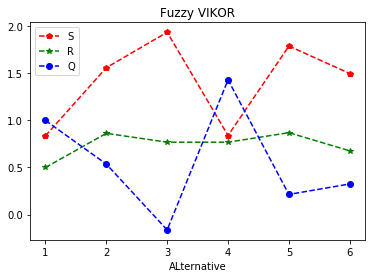

(array([0.837, 1.561, 1.938, 0.84 , 1.791, 1.499]),
 array([0.5  , 0.863, 0.769, 0.769, 0.87 , 0.677]),
 array([ 1.        ,  0.53651423, -0.16378378,  1.43185654,  0.21362398,
         0.32499251]))

In [312]:
fuzzy_vikor(cw,cdw,R,all_rating,crit_max_min,4,6,3,'y')

In [313]:
w=agg_fuzzy_value(cw,cdw,3)
f_rdm_all=agg_fuzzy_value(R,all_rating,3)
    

In [314]:
w

array([[0.7  , 0.867, 0.933, 1.   ],
       [0.4  , 0.733, 0.767, 1.   ],
       [0.2  , 0.467, 0.533, 0.8  ],
       [0.5  , 0.767, 0.833, 1.   ]])

In [315]:
f_rdm_all

array([[0.5  , 0.767, 0.833, 1.   ],
       [0.4  , 0.567, 0.633, 0.8  ],
       [0.1  , 0.233, 0.267, 0.5  ],
       [0.7  , 0.833, 0.867, 1.   ],
       [0.2  , 0.433, 0.467, 0.6  ],
       [0.4  , 0.733, 0.767, 1.   ],
       [0.5  , 0.767, 0.833, 1.   ],
       [0.2  , 0.467, 0.533, 0.8  ],
       [0.2  , 0.467, 0.533, 0.8  ],
       [0.5  , 0.7  , 0.8  , 1.   ],
       [0.2  , 0.433, 0.467, 0.6  ],
       [0.1  , 0.233, 0.267, 0.5  ],
       [0.5  , 0.8  , 0.9  , 1.   ],
       [0.7  , 0.833, 0.867, 1.   ],
       [0.5  , 0.767, 0.833, 1.   ],
       [0.   , 0.233, 0.267, 0.6  ],
       [0.   , 0.333, 0.367, 0.9  ],
       [0.   , 0.167, 0.233, 0.5  ],
       [0.7  , 0.833, 0.867, 1.   ],
       [0.5  , 0.667, 0.733, 0.9  ],
       [0.4  , 0.7  , 0.7  , 0.9  ],
       [0.2  , 0.467, 0.533, 0.8  ],
       [0.4  , 0.667, 0.733, 1.   ],
       [0.1  , 0.333, 0.367, 0.6  ]])

In [318]:
n=4
m=6
crispy_weights=np.zeros(n)
for i in range(n):
    crispy_weights[i]=np.round(defuzzy(w[i]),3)
crispy_alernative_ratings=np.zeros((m,n))
k=0
for i in range(m):
    for j in range(n):
        crispy_alernative_ratings[i,j]=np.round(defuzzy(f_rdm_all[k]),3)
        k=k+1

In [319]:
crispy_alernative_ratings

array([[0.769, 0.6  , 0.282, 0.85 ],
       [0.418, 0.718, 0.769, 0.5  ],
       [0.5  , 0.75 , 0.418, 0.282],
       [0.789, 0.85 , 0.769, 0.282],
       [0.415, 0.231, 0.85 , 0.7  ],
       [0.667, 0.5  , 0.7  , 0.35 ]])

In [276]:
crispy_weights

array([0.87 , 0.718, 0.5  , 0.769])

In [277]:
np.round(np.min(crispy_alernative_ratings[:,2]),3)

0.282

In [307]:
e=np.array(['MAX','MAX','MAX','MAX'])
s,r=SR(crispy_alernative_ratings,b_w_fij(crispy_alernative_ratings,e),crispy_weights)

In [298]:
b=b_w_fij(crispy_alernative_ratings,e)

In [280]:
crispy_alernative_ratings[:,0]

array([0.769, 0.418, 0.5  , 0.789, 0.415, 0.667])

In [323]:
b

array([[0.789, 0.415],
       [0.85 , 0.231],
       [0.85 , 0.282],
       [0.85 , 0.282]])

In [291]:
a=b_w_value(crispy_alernative_ratings,e)

In [292]:
a

array([[0.789, 0.415],
       [0.85 , 0.231],
       [0.85 , 0.282],
       [0.85 , 0.282]])

In [283]:
np.min(crispy_alernative_ratings[:,0])

0.415

In [284]:
np.min(crispy_alernative_ratings[:,1])

0.231

In [299]:
b[:,1]

array([0.415, 0.231, 0.282, 0.282])

In [308]:
Q(s,r,6)

array([ 1.        ,  0.57348532, -0.19498069,  1.51463394,  0.22888283,
        0.31094758])

In [309]:
s

array([0.837, 1.561, 1.938, 0.84 , 1.791, 1.499])

In [310]:
r

array([0.5  , 0.863, 0.769, 0.769, 0.87 , 0.677])

In [320]:
v=np.zeros(4)
for i in range(4):
    v[i]=defuzzy(f_rdm_all[i])

In [321]:
v

array([0.76861013, 0.6       , 0.28202765, 0.85      ])

In [322]:
f_rdm_all[0:4]

array([[0.5  , 0.767, 0.833, 1.   ],
       [0.4  , 0.567, 0.633, 0.8  ],
       [0.1  , 0.233, 0.267, 0.5  ],
       [0.7  , 0.833, 0.867, 1.   ]])